# Practical example

## Importing the relevant libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Loading the raw data

In [73]:
raw_data = pd.read_csv(r'C:\Users\MekChou\OneDrive\Code\Udemy\UdemyDSBootcamp\Data\S35_L225\1.04. Real-life example.csv')
raw_data


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

### Exploring the descriptive statistics of the variables

In [74]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [75]:

raw_data['Model']

0                     320
1            Sprinter 212
2                   S 500
3                      Q7
4                   Rav 4
              ...        
4340                S 350
4341                  535
4342                  520
4343              Corolla
4344    T5 (Transporter) 
Name: Model, Length: 4345, dtype: object

In [76]:
data = raw_data.drop(['Model','Registration','Engine Type'], axis=1)

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,4345,4173.00,4345,4345.00,4195.00,4345.00
unique,7,NaN,6,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,NaN
freq,936,NaN,1649,NaN,NaN,NaN
mean,NaN,19418.75,NaN,161.24,2.79,2006.55
std,NaN,25584.24,NaN,105.71,5.07,6.72
min,NaN,600.00,NaN,0.00,0.60,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,2012.00


### Dealing with missing values

In [77]:
data.isnull().sum()
# Rule of thumb: if you are removing <5% of observations, you are free to just remove all that have MV

Brand        0
Price      172
Body         0
Mileage      0
EngineV    150
Year         0
dtype: int64

In [78]:
data_no_mv = data.dropna(axis=0)

In [79]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,4025,4025.00,4025,4025.00,4025.00,4025.00
unique,7,NaN,6,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,NaN
freq,880,NaN,1534,NaN,NaN,NaN
mean,NaN,19552.31,NaN,163.57,2.76,2006.38
std,NaN,25815.73,NaN,103.39,4.94,6.70
min,NaN,600.00,NaN,0.00,0.60,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,2012.00


### Exploring the PDFs

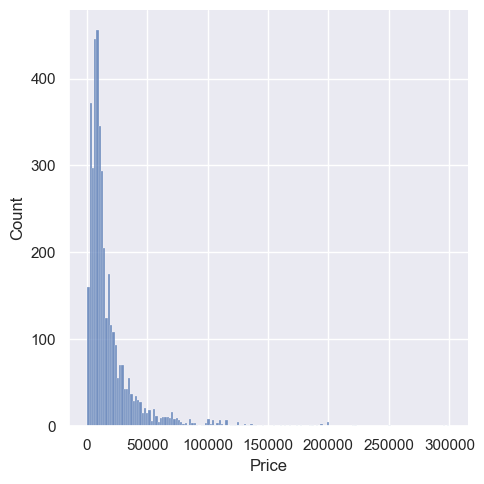

In [80]:
sns.displot(data_no_mv['Price'])
# One way to deal with outliers seemlessly is to remove top 1% of observations

### Dealing with outliers

In [81]:
# simple way: DataFrame.quantile(the quantile) returns the value at a given quantile
q = data_no_mv['Price'].quantile(0.99)
p = data_no_mv['Price'].quantile(0.05)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1 = data_1[data_1['Price']>p]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,3772,3772.00,3772,3772.00,3772.00,3772.00
unique,7,NaN,6,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,NaN
freq,821,NaN,1427,NaN,NaN,NaN
mean,NaN,18724.26,NaN,160.84,2.76,2006.94
std,NaN,19119.04,NaN,100.88,4.83,6.09
min,NaN,2650.00,NaN,0.00,0.60,1969.00
25%,NaN,7600.00,NaN,90.00,1.80,2004.00
50%,NaN,11955.00,NaN,154.00,2.20,2008.00
75%,NaN,22000.00,NaN,222.00,3.00,2012.00


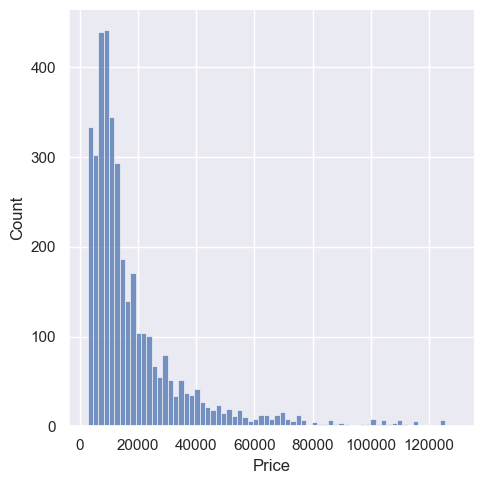

In [82]:
sns.displot(data_1['Price'])

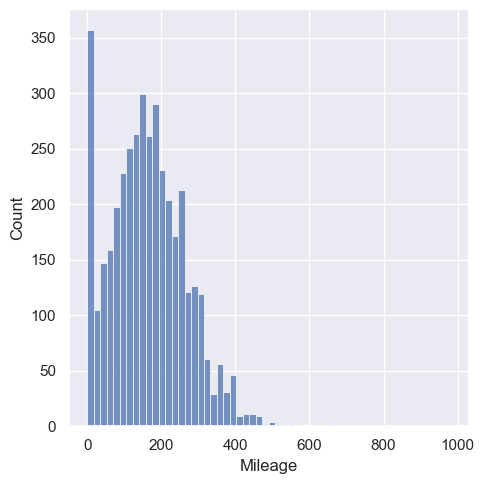

In [83]:
sns.displot(data_no_mv['Mileage'])

In [84]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,3734,3734.00,3734,3734.00,3734.00,3734.00
unique,7,NaN,6,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,NaN
freq,809,NaN,1414,NaN,NaN,NaN
mean,NaN,18823.16,NaN,157.21,2.76,2007.04
std,NaN,19150.79,NaN,93.92,4.85,6.00
min,NaN,2650.00,NaN,0.00,0.60,1969.00
25%,NaN,7700.00,NaN,90.00,1.80,2004.00
50%,NaN,11999.00,NaN,153.00,2.20,2008.00
75%,NaN,22475.00,NaN,220.00,3.00,2012.00


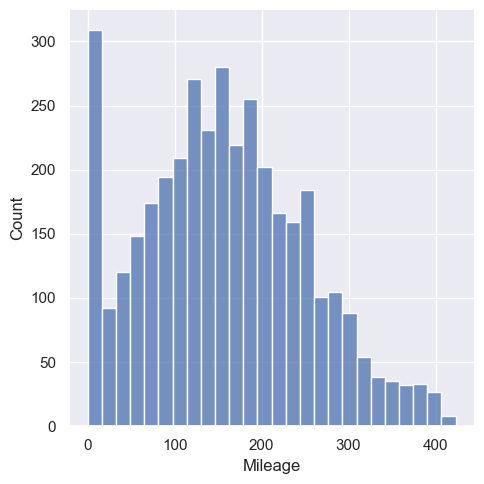

In [85]:
sns.displot(data_2['Mileage'])

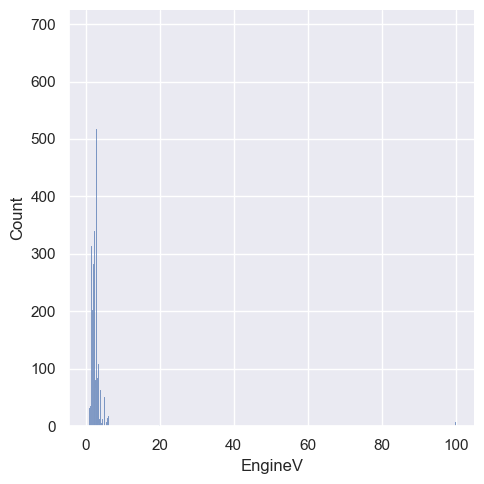

In [86]:
sns.displot(data_no_mv['EngineV'])

In [87]:
# q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<6.5]
data_3 = data_3[data_3['EngineV']>1.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,3260,3260.00,3260,3260.00,3260.00,3260.00
unique,7,NaN,6,NaN,NaN,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,NaN
freq,729,NaN,1322,NaN,NaN,NaN
mean,NaN,20144.84,NaN,161.08,2.61,2006.72
std,NaN,20045.59,NaN,95.84,0.94,6.11
min,NaN,2650.00,NaN,0.00,1.59,1969.00
25%,NaN,8100.00,NaN,90.00,2.00,2003.00
50%,NaN,12925.00,NaN,158.00,2.40,2008.00
75%,NaN,24000.00,NaN,230.00,3.00,2011.00


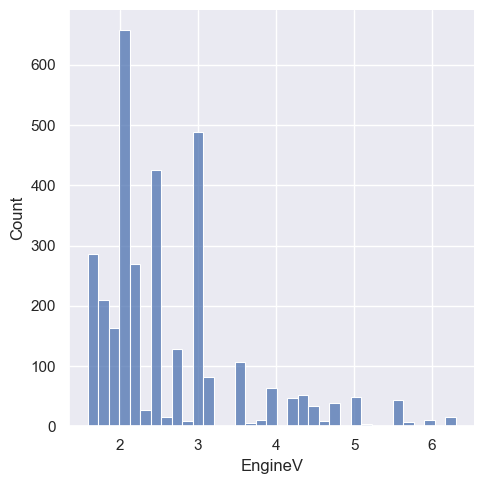

In [88]:
sns.displot(data_3['EngineV'])

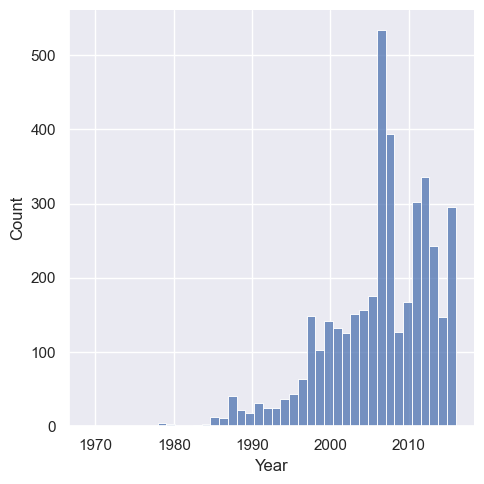

In [89]:
sns.displot(data_no_mv['Year'])

In [90]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

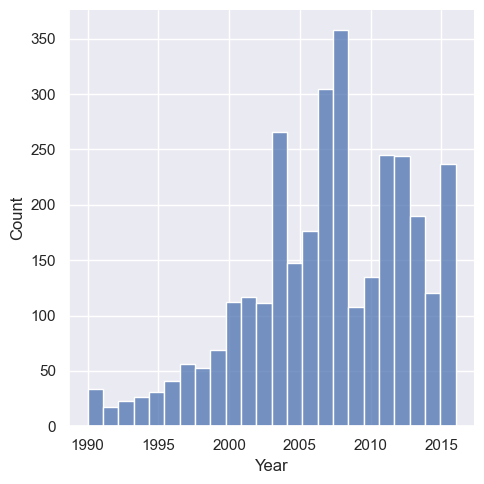

In [91]:
sns.displot(data_4['Year'])

In [92]:
data_cleaned = data_4.reset_index(drop=True)

In [93]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Year
count,3221,3221.00,3221,3221.00,3221.00,3221.00
unique,7,NaN,6,NaN,NaN,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,NaN
freq,717,NaN,1291,NaN,NaN,NaN
mean,NaN,20333.33,NaN,160.16,2.62,2006.97
std,NaN,20084.97,NaN,94.99,0.94,5.71
min,NaN,2650.00,NaN,0.00,1.59,1990.00
25%,NaN,8300.00,NaN,90.00,2.00,2003.00
50%,NaN,13000.00,NaN,157.00,2.40,2008.00
75%,NaN,24500.00,NaN,226.00,3.00,2011.00


### Checking the OLS assumptions

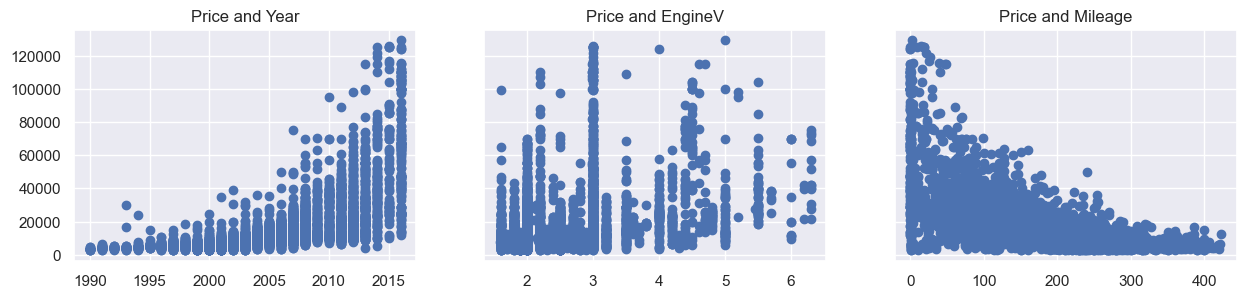

In [94]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

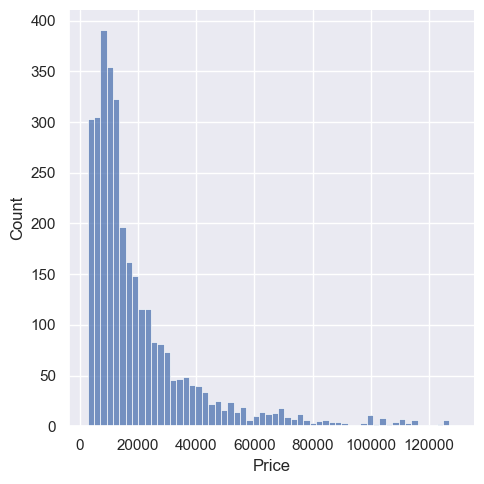

In [95]:
sns.displot(data_cleaned['Price'])

#### Relaxing the assumptions

In [96]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Year,log_price
0,BMW,4200.00,sedan,277,2.00,1991,8.34
1,Mercedes-Benz,13300.00,sedan,358,5.00,2003,9.50
2,Audi,23000.00,crossover,240,4.20,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,2011,9.81
4,Audi,14200.00,vagon,200,2.70,2006,9.56
...,...,...,...,...,...,...,...
3216,Volkswagen,11500.00,van,163,2.50,2008,9.35
3217,Toyota,17900.00,sedan,35,1.60,2014,9.79
3218,Mercedes-Benz,125000.00,sedan,9,3.00,2014,11.74
3219,BMW,6500.00,sedan,1,3.50,1999,8.78


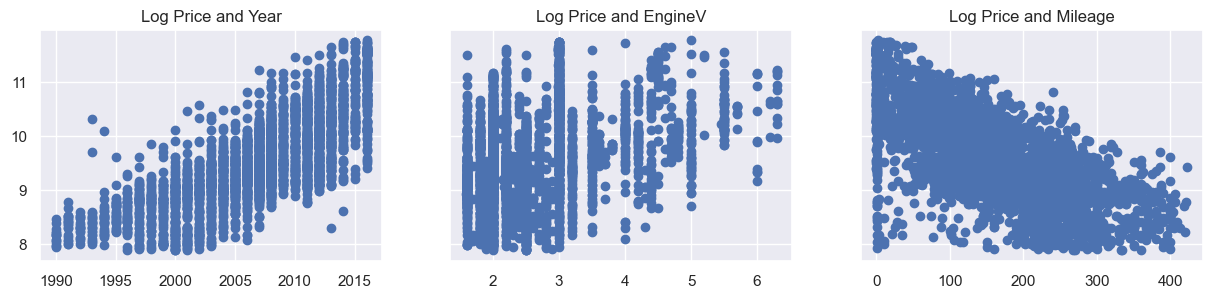

In [97]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [98]:
# data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

#### Multicollinearity

In [99]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Year', 'log_price'],
      dtype=object)

In [100]:
# sklearn does not have dedicated method to check multicollinearity. 
# One of the best ways to check multicollinearity is through VIF(variance inflation factor)
# check articles 
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [101]:
# VIF = 1: no multicollinearity
# 1 < VIF < 5 : okay
# 5/6/10 < VIF: unacceptable
vif

,VIF,features
0,3.82,Mileage
1,11.89,Year
2,8.80,EngineV


In [102]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### Create dummy variables

In [103]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [104]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0
4,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0


In [105]:
variables = data_with_dummies[['Mileage','EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [106]:
vif

,VIF,features
0,4.20,Mileage
1,5.59,EngineV
2,2.03,Brand_BMW
3,2.43,Brand_Mercedes-Benz
4,1.29,Brand_Mitsubishi
5,1.73,Brand_Toyota
6,2.01,Brand_Volkswagen
7,1.10,Body_hatch
8,1.38,Body_other
9,2.47,Body_sedan


In [107]:
data_with_dummies2 = pd.get_dummies(data_no_multicollinearity, drop_first = False)

In [108]:
data_with_dummies2.head()
data_with_dummies2.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van'],
      dtype='object')

In [109]:
variables2 = data_with_dummies2[['Mileage','EngineV', 'Brand_Audi', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van']]
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif2["features"] = variables2.columns

In [110]:
vif2

,VIF,features
0,1.15,Mileage
1,1.36,EngineV
2,3.52,Brand_Audi
3,4.78,Brand_BMW
4,5.08,Brand_Mercedes-Benz
5,2.85,Brand_Mitsubishi
6,4.05,Brand_Toyota
7,4.68,Brand_Volkswagen
8,10.37,Body_crossover
9,1.87,Body_hatch


### Rearrange a bit

In [111]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van'], dtype=object)

In [112]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van']

In [113]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0
1,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0
2,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0
3,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0
4,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0


### Linear regression model

#### Declare the inputs and the targets

In [114]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [115]:
targets.head()


0    8.34
1    9.50
2   10.04
3    9.81
4    9.56
Name: log_price, dtype: float64

In [116]:
inputs.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,277,2.00,1,0,0,0,0,0,0,0,1,0,0
1,358,5.00,0,1,0,0,0,0,0,0,1,0,0
2,240,4.20,0,0,0,0,0,0,0,0,0,0,0
3,120,2.00,0,0,0,0,1,0,0,0,0,0,0
4,200,2.70,0,0,0,0,0,0,0,0,0,1,0


#### Scale the data

In [117]:
# it's not usually recommended to standardize dummy variables
# in ml perspective, scaling has no effect on the predictive power of dummies. once scaled, they lose all their dummy meaning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [118]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [120]:
y_train

2109   10.20
7       9.68
296     9.46
892     9.64
1042    8.76
        ... 
2309    9.20
428     8.73
859    10.94
801     8.84
2740    9.10
Name: log_price, Length: 2576, dtype: float64

#### Create the regression

In [121]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [122]:
y_hat = reg.predict(x_train)

In [123]:
y_hat

array([10.24495002,  9.70110509,  9.22679949, ..., 10.79657333,
        8.84527191,  9.30355374])

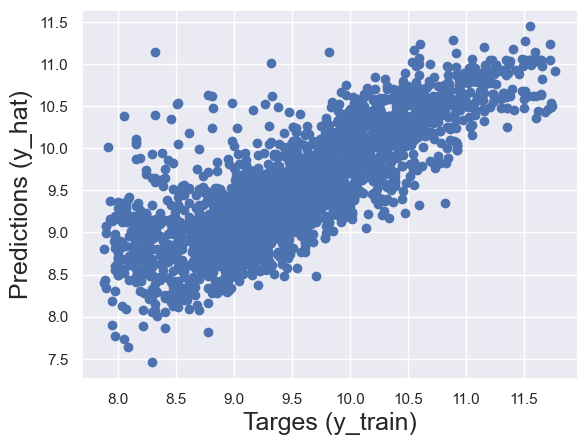

In [124]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targes (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size = 18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

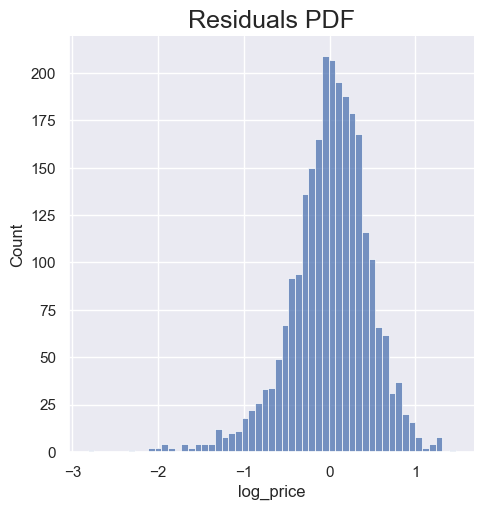

In [125]:
# Residual = dif between targets adn predictions
# residuals are the estimates of errors and should be normal distribution with mean=0
# There's long tail - there are certain observations for which (y_train - y_hat) is much lower than mean(much higher price is predicted than observed)
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [126]:
reg.score(x_train,y_train)

0.6748508406663566

#### Finding the weights and bias

In [127]:
reg.intercept_

9.572575456106502

In [128]:
reg.coef_

array([-0.52761807,  0.18417685,  0.02384209,  0.0459653 , -0.13154586,
       -0.09354933, -0.06287273, -0.06110557, -0.12503602, -0.09659002,
       -0.22550755, -0.13894867, -0.09487598])

In [129]:
# Weights interpretation:
# The bigger the weight, the bigger impact
# Dummies are only compared the their respective benchmark

# Continuous variables:
# 1. A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively
# 2. A negative weight shows that as a feature decreases in value, so do the log_price and 'Price' respectively
# Dummy variables:
# 1. A positive weight shows that the respective category(brand) is more expensive than the benchmark(Audi. which is dropped)
# 1. A negative weight shows that the respective category(brand) is more cheaper than the benchmark(Audi. which is dropped)


reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.53
1,EngineV,0.18
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.05
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.09
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.06
8,Body_hatch,-0.13
9,Body_other,-0.10


In [130]:
data_cleaned['Brand'].unique

<bound method Series.unique of 0                 BMW
1       Mercedes-Benz
2                Audi
3              Toyota
4                Audi
            ...      
3216       Volkswagen
3217           Toyota
3218    Mercedes-Benz
3219              BMW
3220       Volkswagen
Name: Brand, Length: 3221, dtype: object>

#### Testing

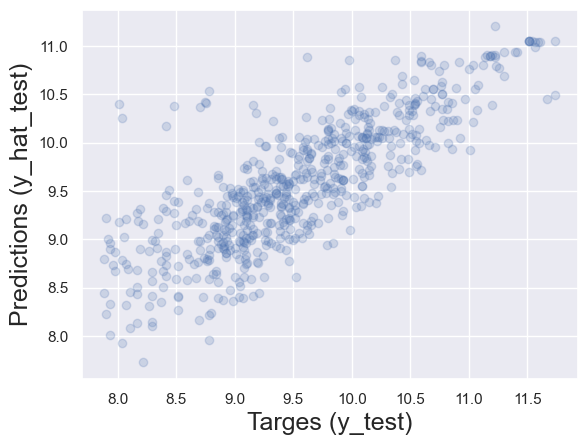

In [131]:
y_hat_test = reg.predict(x_test)

# plt.scatter(x,y[,alpha]) creates a sctter plat.
# alpha: specifies the opacity
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targes (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size = 18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

In [132]:
# np.exp(x) returns the exponential of x
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7691.68
1,35413.47
2,9214.99
3,49125.25
4,4283.58


In [133]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7691.68,NaN
1,35413.47,13300.00
2,9214.99,NaN
3,49125.25,NaN
4,4283.58,NaN
5,30987.39,NaN
6,25068.56,NaN
7,20667.65,NaN
8,7591.09,NaN
9,7754.77,NaN


In [134]:
y_test

2651    8.88
960    10.33
2023    8.85
2795   10.79
2573    8.99
2407    9.99
96     10.15
376     9.85
1907    8.95
422     9.84
2093    9.16
1466    9.05
2731    8.29
2316    8.32
322     9.30
3042    9.71
460    10.56
916    10.26
2285    9.16
1665    9.77
2296    9.14
2555   10.53
51      9.10
682    10.49
2498    9.66
1906   10.31
921     8.68
1258    9.19
2746    9.43
117    10.36
2688    8.10
438     9.30
2517    9.74
1872    8.78
1816    8.10
2603   11.40
448     9.89
19      9.79
586     9.43
560    10.52
122     9.08
2264    9.49
967     8.07
2884    8.76
1723   10.13
1935    9.09
2871    9.79
1910    9.00
1295    9.25
2265   11.74
1862    9.65
1289   10.39
1737    9.35
340    10.57
3053    9.09
837     8.79
1461    8.07
2396    8.58
1607    9.79
2332    8.84
86      8.76
1152    9.14
2908    9.98
3129    8.04
1069    9.46
639     9.28
745     7.97
2277   10.53
2712   10.90
1779   10.00
2268    8.65
1196   10.04
1119   10.03
237     8.16
1354   10.15
2019    9.46
159    10.12

In [135]:
# the data is split between test and train. pandas tried to match the indices here so we can drop original index
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.88
1   10.33
2    8.85
3   10.79
4    8.99
Name: log_price, dtype: float64

In [136]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7691.68,7200.00
1,35413.47,30500.00
2,9214.99,7000.00
3,49125.25,48535.50
4,4283.58,8000.00
5,30987.39,21900.00
6,25068.56,25500.00
7,20667.65,18999.00
8,7591.09,7700.00
9,7754.77,18700.00


In [137]:
# OLS framework is based on minimizing SSE. that's achieved by minizing the sum of squared residuals (SSE)
# therefore, examing the residual is the same as examining the heart of the optimization algorithm

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [138]:
df_pf['Difference%'] = df_pf['Residual'] / df_pf['Target'] * 100
df_pf

,Prediction,Target,Residual,Difference%
0,7691.68,7200.00,-491.68,-6.83
1,35413.47,30500.00,-4913.47,-16.11
2,9214.99,7000.00,-2214.99,-31.64
3,49125.25,48535.50,-589.75,-1.22
4,4283.58,8000.00,3716.42,46.46
5,30987.39,21900.00,-9087.39,-41.49
6,25068.56,25500.00,431.44,1.69
7,20667.65,18999.00,-1668.65,-8.78
8,7591.09,7700.00,108.91,1.41
9,7754.77,18700.00,10945.23,58.53


In [139]:
# np.absolute() is a NumPy function that returns the absolute value of an array, i.e., the magnitude of the values without regard to their sign.
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Prediction,Target,Residual,Difference%
0,7691.68,7200.00,-491.68,6.83
1,35413.47,30500.00,-4913.47,16.11
2,9214.99,7000.00,-2214.99,31.64
3,49125.25,48535.50,-589.75,1.22
4,4283.58,8000.00,3716.42,46.46
5,30987.39,21900.00,-9087.39,41.49
6,25068.56,25500.00,431.44,1.69
7,20667.65,18999.00,-1668.65,8.78
8,7591.09,7700.00,108.91,1.41
9,7754.77,18700.00,10945.23,58.53


In [140]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,645.00,645.00,645.00,645.00
mean,17815.57,19808.39,1992.82,43.79
std,12772.78,19682.97,11477.49,74.13
min,2263.62,2650.00,-38099.66,0.28
25%,8951.67,8100.00,-3403.49,14.20
50%,13540.08,12900.00,-45.36,28.01
75%,23037.59,23999.00,4340.56,44.84
max,73168.05,125000.00,88947.56,988.68


In [141]:
# by default pd does not show all data so we change it
pd.options.display.max_rows = 999
# show 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
135,33093.67,33000.00,-93.67,0.28
221,13562.45,13500.00,-62.45,0.46
539,6545.36,6500.00,-45.36,0.70
237,8931.10,9000.00,68.90,0.77
404,12609.55,12500.00,-109.55,0.88
367,12431.82,12300.00,-131.82,1.07
182,6473.04,6399.00,-74.04,1.16
195,23472.29,23200.00,-272.29,1.17
3,49125.25,48535.50,-589.75,1.22
616,45920.57,46500.00,579.43,1.25


bottom of predictions above are far off. the observed prices(targets) are extremely low.
on average our model is decent at predicting the price but not those in the end.
Their predictions are higher than the targets since the residuals are low.
reason may be that we are missing important factor to drive low price, dmg etc.

Text(0.5, 1.0, 'Residuals PDF')

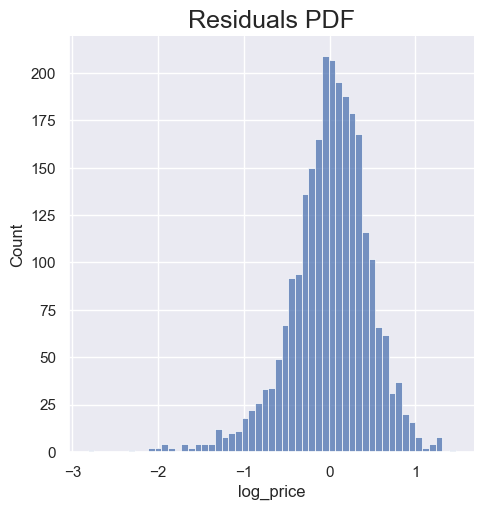

In [142]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

How to improve our model?
1. use a different set of variables
2. remove a bigger part of the outliers
3. use different kinds of transformations